# Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, tree, naive_bayes
from sklearn.metrics import mean_squared_error, accuracy_score

# Data Acquisition

Loading data

In [2]:
# - Loading winequality-red data,containing chemical measures of wine from Vinho Verde region of Portugal
# - multi-class classification, could be reformed as regression
# - imbalanced classes (more normal wines than excellent), some features are irrelevant

df = pd.read_csv('DATA\winequality-red.csv', sep=';')   # data separated by semicolon, not comma

## Data Analysis

In [3]:
# data analysis : need more
print("Shape of input dataframe: " + str(df.shape))
print(df.columns)
df.head()

Shape of input dataframe: (1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# checking for missing values : no missing values 
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:xlabel='quality', ylabel='Count'>

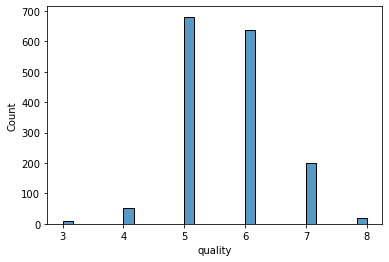

In [5]:
# distribution histogram of quality label
sns.histplot(data=df,x='quality')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

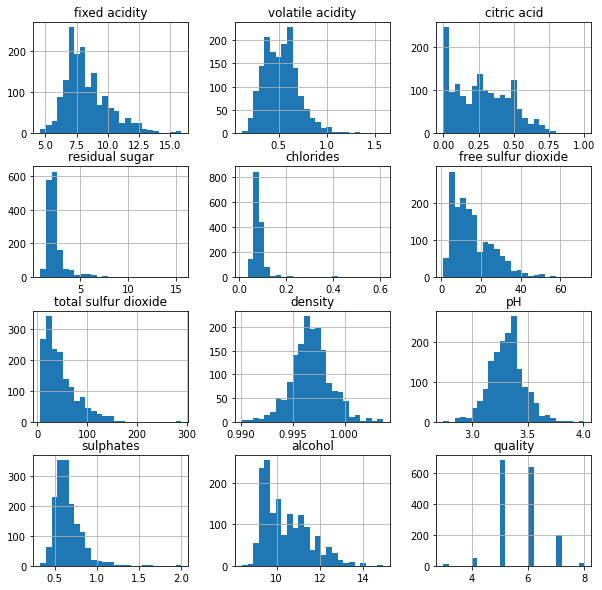

In [6]:
# histogram distributions of the independent variables
df.hist(bins=25,figsize=(10,10))

<AxesSubplot:>

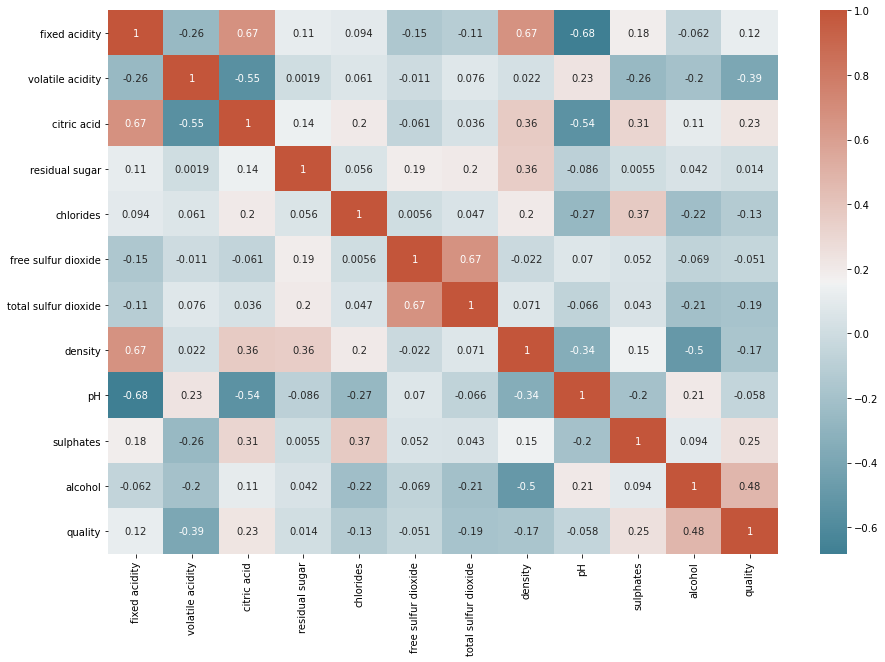

In [7]:
# Correlation Matrix
# to see correlations between the variables
# looking for input variables that are strongly correlated to label (quality)
# --> those will likely be informative features in the learning model
corr = df.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [8]:
# analysis ideas: https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46
# checking each feature's statistical summary to identify problems like outliers/abnormal distributions

In [9]:
# further analyze relationship with our dependent variable: create density plots visualizing the spread of data

In [10]:
# plot interaction between numeric variables of interest and our dependent variable of quality

## Data Preprocessing

Separating Data (labels/features and train/test)

In [11]:
# reframing for binary classification
df_c = df.copy()
df_c['goodquality'] = [1 if x>=7 else 0 for x in df['quality']]
df_c = df_c.drop(['quality'],axis=1)

# separating labels and features for binary classification: good wine has score >=7
labels = df_c['goodquality']
features = df_c.drop(['goodquality'],axis=1)

#sns.histplot(data=df_c,x='goodquality')
df_c.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
# train/test split :: should i stratify split?
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3,random_state=123, stratify=labels)
print(X_train.shape)
print(X_test.shape)
print(labels.value_counts())

(1119, 11)
(480, 11)
0    1382
1     217
Name: goodquality, dtype: int64


Feature Scaling (testing normalization vs. standardization via sklearn)

In [13]:
# Normalizing Data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

pd.DataFrame(X_train_norm)
pd.DataFrame(X_test_norm)

,0,1,2,3,4,5,6,7,8,9,10
0,0.357798,0.419643,0.632911,0.062992,0.778068,0.347826,0.487013,0.420601,0.168539,1.000000,0.129032
1,0.155963,0.562500,0.151899,0.062992,0.122715,0.130435,0.480519,0.369099,0.550562,0.106557,0.225806
2,0.183486,0.276786,0.379747,0.062992,0.120104,0.043478,0.214286,0.168240,0.494382,0.057377,0.516129
3,0.568807,0.142857,0.708861,0.055118,0.093995,0.202899,0.350649,0.557940,0.303371,0.155738,0.177419
4,0.146789,0.410714,0.000000,0.078740,0.159269,0.681159,0.370130,0.338197,0.786517,0.237705,0.435484
...,...,...,...,...,...,...,...,...,...,...,...
475,0.302752,0.125000,0.468354,0.015748,0.096606,0.072464,0.110390,0.506438,0.415730,0.254098,0.145161
476,0.229358,0.410714,0.037975,0.228346,0.107050,0.347826,0.259740,0.379399,0.146067,0.065574,0.080645
477,0.201835,0.232143,0.392405,0.062992,0.044386,0.173913,0.149351,0.276395,0.382022,0.303279,0.419355
478,0.302752,0.169643,0.493671,0.094488,0.101828,0.202899,0.240260,0.252361,0.471910,0.311475,0.612903


In [14]:
# Standardizing Data (reminder: transform to have mean 0 and SD 1)
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)

pd.DataFrame(X_train_stand)
pd.DataFrame(X_test_stand)

,0,1,2,3,4,5,6,7,8,9,10
0,0.328179,0.352524,1.200582,-0.374967,6.292423,0.941406,1.035171,-0.221081,-1.864617,6.296795,-0.890938
1,-0.971249,1.253485,-0.777791,-0.374967,0.024711,-0.432631,1.004058,-0.557007,0.468656,-0.877758,-0.310592
2,-0.794054,-0.548436,0.159333,-0.374967,-0.000260,-0.982245,-0.271554,-1.867117,0.125528,-1.272688,1.430445
3,1.686672,-1.393087,1.512956,-0.443181,-0.249970,0.025381,0.381808,0.674721,-1.041109,-0.482829,-0.600765
4,-1.030314,0.296214,-1.402540,-0.238538,0.374304,3.048261,0.475146,-0.758562,1.909796,0.175387,0.946823
...,...,...,...,...,...,...,...,...,...,...,...
475,-0.026210,-1.505707,0.523770,-0.784254,-0.224999,-0.799040,-0.769353,0.338795,-0.354852,0.307030,-0.794214
476,-0.498729,0.296214,-1.246353,1.057539,-0.125115,0.941406,-0.053766,-0.489822,-2.001868,-1.206866,-1.181111
477,-0.675924,-0.829986,0.211395,-0.374967,-0.724418,-0.157823,-0.582678,-1.161673,-0.560729,0.701960,0.850099
478,-0.026210,-1.224156,0.627895,-0.102109,-0.175057,0.025381,-0.147104,-1.318438,-0.011724,0.767781,2.010791


# Learning Models

Creating models

In [15]:
# creating models (decision tree, logistic regression)
dt = tree.DecisionTreeClassifier(max_depth=5)
logreg= linear_model.LogisticRegression()
rnd = RandomForestClassifier()

Training Models

In [16]:
# fit to models

# normalized data
dt_n = dt.fit(X_train_norm, y_train)
logreg_n = logreg.fit(X_train_norm, y_train)
rnd_n = rnd.fit(X_train_norm, y_train)

# standardized data
dt_s = dt.fit(X_train_stand, y_train)
logreg_s = logreg.fit(X_train_stand, y_train)
rnd_s = rnd.fit(X_train_stand, y_train)

Generating Predictions

In [17]:
# predict
y_hat_dt_n = dt_n.predict(X_test_norm)
y_hat_logreg_n = logreg_n.predict(X_test_norm)
y_hat_rnd_n = rnd_n.predict(X_test_norm)

y_hat_dt_s = dt_s.predict(X_test_stand)
y_hat_logreg_s = logreg_s.predict(X_test_stand)
y_hat_rnd_s = rnd_s.predict(X_test_stand)

Evaluating Performance Metrics

In [18]:
# evaluate baseline performance
mse_dt_n = mean_squared_error(y_test, y_hat_dt_n)
mse_logreg_n = mean_squared_error(y_test, y_hat_logreg_n)

mse_dt_s = mean_squared_error(y_test, y_hat_dt_s)
mse_logreg_s = mean_squared_error(y_test, y_hat_logreg_s)

acc_logreg_s = accuracy_score(y_test, y_hat_logreg_s)

acc_rnd_n = accuracy_score(y_test, y_hat_rnd_n)
acc_rnd_s = accuracy_score(y_test, y_hat_rnd_s)

#print("Mean Squared Errors:")
#print(mse_dt_n)
#print(mse_logreg_n)
#print(mse_dt_s)
#print(mse_logreg_s)
print("randomforest standardized accuracy: " + str(acc_rnd_s))
print("randomforest normalized accuracy: " + str(acc_rnd_n))
print("logreg standardized accuracy: {}".format(acc_logreg_s))
# data should be standardized not normalized

randomforest standardized accuracy: 0.8979166666666667
randomforest normalized accuracy: 0.8645833333333334
logreg standardized accuracy: 0.88125


# Cross Validation

In [19]:
# since data was standardized before train/test split, restandardizing
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_c)

#labels = df_scaled['goodquality']
#features = df_scaled.drop(['goodquality'],axis=1)

In [20]:
# k fold cross validation

k = 10
kf = KFold(n_splits=k,random_state=None)
model = linear_model.LogisticRegression(solver='liblinear')    # does not converge when not using this solver, why?
model2 = RandomForestClassifier()
model3 = tree.DecisionTreeClassifier(max_depth=10)
scores_1 = []
scores_2 = []
scores_3 = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index,:], features.iloc[test_index,:]
    y_train, y_test = labels[train_index], labels[test_index]
    
    model.fit(X_train, y_train)
    model2.fit(X_train, y_train)
    model3.fit(X_train,y_train)
    y_hat_1 = model.predict(X_test)
    y_hat_2 = model2.predict(X_test)
    y_hat_3 = model3.predict(X_test)
    
    acc = accuracy_score(y_hat_1, y_test)
    acc2 = accuracy_score(y_hat_2, y_test)
    acc3 = accuracy_score(y_hat_3, y_test)
    scores_1.append(acc)
    scores_2.append(acc2)
    scores_3.append(acc3)

avg_acc_1 = sum(scores_1)/k
avg_acc_2 = sum(scores_2)/k
avg_acc_3 = sum(scores_3)/k
print('accuracy of logreg each fold: '+str(scores_1))
print('logreg avg acc: '+str(avg_acc_1))

print('accuracy of randomforest each fold: '+str(scores_2))
print('randomforest avg acc: '+str(avg_acc_2))

print('accuracy of dt each fold: '+str(scores_3))
print('dt avg acc: '+str(avg_acc_3))

accuracy of logreg each fold: [0.925, 0.89375, 0.79375, 0.9, 0.9625, 0.80625, 0.76875, 0.85, 0.94375, 0.8930817610062893]
logreg avg acc: 0.8736831761006287
accuracy of randomforest each fold: [0.95, 0.925, 0.81875, 0.83125, 0.975, 0.8125, 0.76875, 0.86875, 0.9375, 0.9056603773584906]
randomforest avg acc: 0.8793160377358491
accuracy of dt each fold: [0.925, 0.90625, 0.75, 0.7625, 0.94375, 0.73125, 0.78125, 0.7875, 0.89375, 0.8364779874213837]
dt avg acc: 0.8317727987421384
